In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np
%matplotlib inline

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

In [2]:
# Загружаем набор
stud = pd.read_csv('stud_math.xls')
stud.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [3]:
# Теперь можно на него посмотреть
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [4]:
# Целевая переменная содержит пропуски - эти строки можно удалить
stud.dropna(subset=['score'], inplace=True)
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               389 non-null    object 
 1   sex                  389 non-null    object 
 2   age                  389 non-null    int64  
 3   address              374 non-null    object 
 4   famsize              362 non-null    object 
 5   Pstatus              344 non-null    object 
 6   Medu                 386 non-null    float64
 7   Fedu                 365 non-null    float64
 8   Mjob                 370 non-null    object 
 9   Fjob                 353 non-null    object 
 10  reason               372 non-null    object 
 11  guardian             358 non-null    object 
 12  traveltime           361 non-null    float64
 13  studytime            382 non-null    float64
 14  failures             367 non-null    float64
 15  schoolsup            380 non-null    obj

In [5]:
# В задании не описан столбец 'studytime, granular' посмотрим на его корелляцию с другими признаками
stud.corr()['studytime, granular']

age                    0.018227
Medu                  -0.081032
Fedu                  -0.059618
traveltime             0.105910
studytime             -1.000000
failures               0.181947
studytime, granular    1.000000
famrel                -0.046249
freetime               0.125066
goout                  0.053831
health                 0.079180
absences               0.025707
score                 -0.115741
Name: studytime, granular, dtype: float64

In [6]:
# Видим, что признак 'studytime, granular' отрицательно коррелирован с 'studytime' - удаляем его
stud.drop('studytime, granular', axis=1, inplace=True)
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      389 non-null    object 
 1   sex         389 non-null    object 
 2   age         389 non-null    int64  
 3   address     374 non-null    object 
 4   famsize     362 non-null    object 
 5   Pstatus     344 non-null    object 
 6   Medu        386 non-null    float64
 7   Fedu        365 non-null    float64
 8   Mjob        370 non-null    object 
 9   Fjob        353 non-null    object 
 10  reason      372 non-null    object 
 11  guardian    358 non-null    object 
 12  traveltime  361 non-null    float64
 13  studytime   382 non-null    float64
 14  failures    367 non-null    float64
 15  schoolsup   380 non-null    object 
 16  famsup      351 non-null    object 
 17  paid        350 non-null    object 
 18  activities  375 non-null    object 
 19  nursery     374 non-null    o

In [7]:
# Из всех признаков числовыми я бы назвал только age, absences, score
# остальне категориальные
num_features = ['age', 'absences', 'score']
cat_features = list(set(stud.columns) - set(num_features))

## Исследование числовых признаков

In [8]:
def describe(feature):
    display(stud[feature].describe())
    print(f'Количество пропусков: {stud[feature].isna().sum()}')
    print(
        f'Процент пропусков: {round((stud[feature].isna().sum() / len(stud[feature])) * 100, 2)}%')


def outliers(feature):
    # Интерквартильный размах
    perc25 = stud[feature].quantile(0.25)
    perc75 = stud[feature].quantile(0.75)
    IQR = perc75 - perc25
    low, high = (perc25 - 1.5 * IQR, perc75 + 1.5 * IQR)
    print(f'Границы выбросов < {low} и > {high}')
    return stud[(stud[feature] < low) | (stud[feature] > high)]

### score — баллы по госэкзамену по математике

count    389.000000
mean      52.892031
std       21.575895
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Количество пропусков: 0
Процент пропусков: 0.0%
Границы выбросов < -5.0 и > 115.0
Выбросы не обнаружены


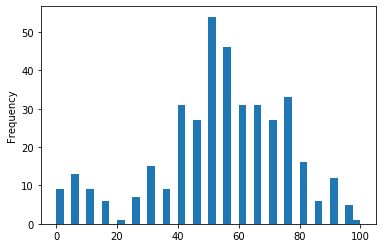

In [25]:
describe('score')
stud['score'].plot.hist(bins=40)
out_df = outliers('score')
if not out_df.empty:
    print('Обнаружены выбросы:')
    display(out_df)
else:
    print('Выбросы не обнаружены')

In [10]:
# Очень много значений score = 0
print(f'Количество score равных 0: {len(stud[stud["score"] == 0])}')
print(f'Процент score равных 0: {round(len(stud[stud["score"] == 0]) * 100 / len(stud), 2)}')
stud[stud["score"] == 0]

Количество score равных 0: 37
Процент score равных 0: 9.51


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
130,GP,F,15,R,GT3,T,3.0,4.0,services,teacher,course,father,2.0,3.0,2.0,no,yes,no,no,yes,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
134,GP,M,15,R,GT3,T,3.0,4.0,at_home,teacher,course,mother,NaN,2.0,0.0,no,yes,no,no,yes,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0.0
135,GP,F,15,U,GT3,T,4.0,4.0,services,NaN,course,mother,1.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,yes,4.0,3.0,3.0,5.0,0.0,0.0
136,GP,M,17,R,GT3,T,3.0,4.0,at_home,other,course,mother,3.0,2.0,0.0,no,no,NaN,no,yes,yes,no,no,NaN,4.0,5.0,5.0,0.0,0.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,NaN,father,2.0,4.0,0.0,yes,yes,no,NaN,yes,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,NaN,1.0,1.0,3.0,no,yes,no,no,yes,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0
146,GP,F,15,U,GT3,T,3.0,2.0,health,services,home,father,1.0,2.0,3.0,no,NaN,no,no,yes,yes,yes,no,3.0,3.0,2.0,3.0,0.0,0.0


In [11]:
# Такой большой процент, при условии что нет студентов с результатом меньше 20 баллов не равных 0, говорит, скорее всего, о том,
# что при результате экзамена меньше 20 баллов ставится 0.  Если это так, то предполагаю 4 возможных сценария обработки этих данных
# 1 - оставить все как есть
# 2 - удалить эти данные из рассмотрения
# 3 - заполнить параметр score равномерно из диапазона 0 - 15 с шагом 5
# 4 - заполнить параметр score как нормально распределенные величины из диапазона 0 - 15  с шагом 5
# Самый "интересный" вариант последний - попробуем его
import scipy.stats as stat
stud = stud.copy()
q25 = stat.norm.ppf(0.25, loc=0, scale=1)
q50 = stat.norm.ppf(0.50, loc=0, scale=1)
q75 = stat.norm.ppf(0.75, loc=0, scale=1)
# Фиксируем генерируемую последовательность
np.random.seed(42)
val = list(map(lambda x: 0 if x < q25 else 5 if x < q50 else 10 if x <
               q75 else 15, np.random.normal(loc=0, scale=1, size=len(stud[stud["score"] < 20]))))
i = 0
for idx, row in stud[stud["score"] < 20].iterrows():
    stud.at[idx, 'score'] = val[i]
    i += 1

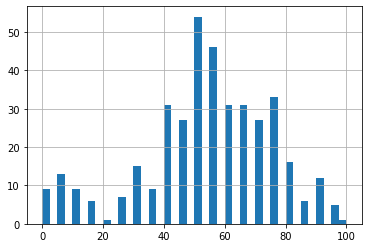

In [12]:
stud['score'].hist(bins=40)

### absences — количество пропущенных занятий

count    378.000000
mean       7.320106
std       23.615525
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

Количество пропусков: 11
Процент пропусков: 2.83%
Границы выбросов < -12.0 и > 20.0
Обнаружены выбросы (17):


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
260,GP,F,18,U,GT3,NaN,4.0,3.0,NaN,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,yes,3.0,1.0,2.0,2.0,21.0,90.0
313,GP,F,19,U,NaN,NaN,3.0,2.0,services,other,reputation,other,2.0,2.0,NaN,no,NaN,NaN,no,no,yes,yes,yes,4.0,2.0,2.0,1.0,22.0,55.0
277,GP,M,18,U,GT3,T,4.0,4.0,NaN,services,home,mother,2.0,1.0,0.0,no,no,yes,yes,yes,yes,yes,no,3.0,2.0,4.0,3.0,22.0,45.0
216,GP,F,17,U,GT3,T,4.0,3.0,other,NaN,reputation,mother,1.0,2.0,2.0,no,no,yes,no,yes,yes,yes,yes,3.0,4.0,5.0,1.0,22.0,20.0
320,GP,F,17,U,GT3,A,4.0,3.0,services,services,course,mother,1.0,2.0,NaN,no,yes,yes,no,yes,NaN,yes,yes,5.0,2.0,2.0,5.0,23.0,65.0
198,GP,F,17,U,GT3,NaN,4.0,4.0,services,teacher,home,mother,2.0,1.0,1.0,no,yes,no,no,yes,yes,NaN,no,4.0,2.0,4.0,2.0,24.0,90.0
40,GP,F,16,U,LE3,T,2.0,2.0,other,other,home,mother,2.0,2.0,1.0,no,NaN,no,yes,no,yes,yes,yes,3.0,3.0,3.0,3.0,25.0,55.0
103,GP,F,15,U,GT3,T,3.0,2.0,services,other,home,mother,2.0,2.0,0.0,yes,yes,yes,no,yes,yes,yes,no,4.0,3.0,5.0,2.0,26.0,30.0
205,GP,F,17,U,GT3,T,3.0,4.0,at_home,services,home,mother,1.0,3.0,1.0,no,yes,yes,no,yes,yes,yes,yes,4.0,4.0,3.0,5.0,28.0,45.0
280,GP,M,17,U,NaN,A,4.0,NaN,services,other,home,mother,2.0,1.0,NaN,no,no,yes,yes,yes,yes,yes,NaN,4.0,NaN,4.0,5.0,30.0,40.0


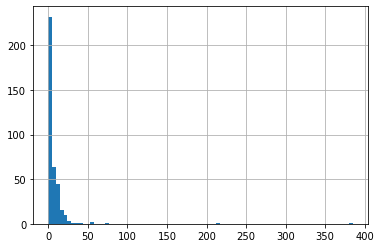

In [13]:
describe('absences')
stud['absences'].hist(bins=80)
out_df = outliers('absences')
if not out_df.empty:
    print(f'Обнаружены выбросы ({len(out_df)}):')
    display(out_df.sort_values('absences'))
else:
    print('Выбросы не обнаружены')

In [14]:
# Пропуски, в данном случае, можно заполнить медианным значением
stud['absences'].fillna(stud['absences'].median(), inplace=True)

In [15]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      389 non-null    object 
 1   sex         389 non-null    object 
 2   age         389 non-null    int64  
 3   address     374 non-null    object 
 4   famsize     362 non-null    object 
 5   Pstatus     344 non-null    object 
 6   Medu        386 non-null    float64
 7   Fedu        365 non-null    float64
 8   Mjob        370 non-null    object 
 9   Fjob        353 non-null    object 
 10  reason      372 non-null    object 
 11  guardian    358 non-null    object 
 12  traveltime  361 non-null    float64
 13  studytime   382 non-null    float64
 14  failures    367 non-null    float64
 15  schoolsup   380 non-null    object 
 16  famsup      351 non-null    object 
 17  paid        350 non-null    object 
 18  activities  375 non-null    object 
 19  nursery     374 non-null    o

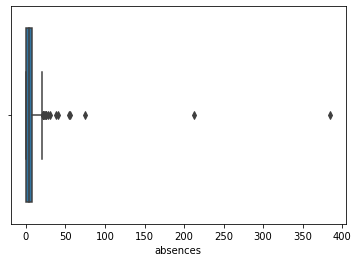

In [24]:
_ = sns.boxplot(x=stud['absences'])

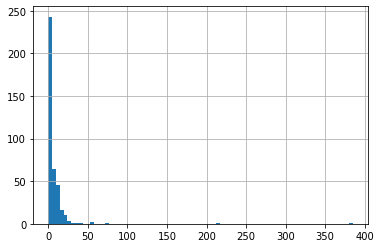

In [17]:
# Формула интерквартильного расстояния дает слишком много выбросов
# Подозрение вызывают только записи, где absences >= 30.
# С другой стороны эти студенты получили достаточно низкие баллы,
# а у студента с количеством пропусков 385 отец учитель и он мог находиться на домашнем обучении
#stud = stud[stud['absences'].between(0, 30)]
stud['absences'].hist(bins=80)

In [18]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      389 non-null    object 
 1   sex         389 non-null    object 
 2   age         389 non-null    int64  
 3   address     374 non-null    object 
 4   famsize     362 non-null    object 
 5   Pstatus     344 non-null    object 
 6   Medu        386 non-null    float64
 7   Fedu        365 non-null    float64
 8   Mjob        370 non-null    object 
 9   Fjob        353 non-null    object 
 10  reason      372 non-null    object 
 11  guardian    358 non-null    object 
 12  traveltime  361 non-null    float64
 13  studytime   382 non-null    float64
 14  failures    367 non-null    float64
 15  schoolsup   380 non-null    object 
 16  famsup      351 non-null    object 
 17  paid        350 non-null    object 
 18  activities  375 non-null    object 
 19  nursery     374 non-null    o

### age — возраст ученика (от 15 до 22)

count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

Количество пропусков: 0
Процент пропусков: 0.0%
Границы выбросов < 13.0 и > 21.0
Обнаружены выбросы (1):


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
247,GP,M,22,U,GT3,T,3.0,1.0,services,services,other,mother,1.0,1.0,3.0,no,no,no,no,no,no,yes,yes,5.0,4.0,5.0,1.0,16.0,40.0


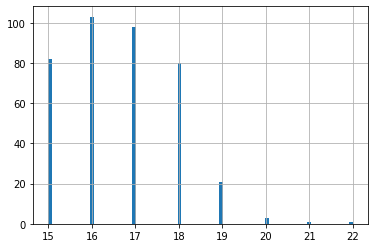

In [19]:
describe('age')
stud['age'].hist(bins=80)
out_df = outliers('age')
if not out_df.empty:
    print(f'Обнаружены выбросы ({len(out_df)}):')
    display(out_df.sort_values('age'))
else:
    print('Выбросы не обнаружены')

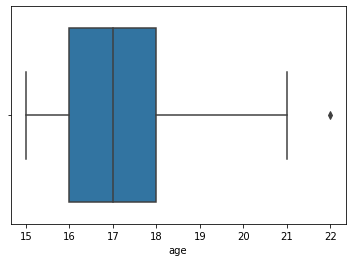

In [20]:
sns.boxplot(x=stud['age'])

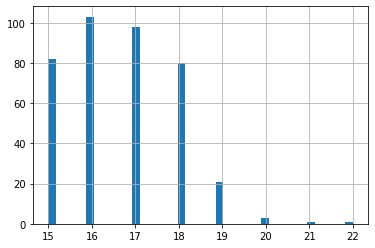

In [21]:
# Студенты старше 21 года определяются как выбросы, но в задании указан интервад от 15 до 22 лет,
# поэтому оставляем
#stud = stud[stud['age'].between(0, 21)]
stud['age'].hist(bins=40)

In [22]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      389 non-null    object 
 1   sex         389 non-null    object 
 2   age         389 non-null    int64  
 3   address     374 non-null    object 
 4   famsize     362 non-null    object 
 5   Pstatus     344 non-null    object 
 6   Medu        386 non-null    float64
 7   Fedu        365 non-null    float64
 8   Mjob        370 non-null    object 
 9   Fjob        353 non-null    object 
 10  reason      372 non-null    object 
 11  guardian    358 non-null    object 
 12  traveltime  361 non-null    float64
 13  studytime   382 non-null    float64
 14  failures    367 non-null    float64
 15  schoolsup   380 non-null    object 
 16  famsup      351 non-null    object 
 17  paid        350 non-null    object 
 18  activities  375 non-null    object 
 19  nursery     374 non-null    o

## Исследование категориальных признаков